In [1]:
# Import des modules nécessaires et définition de fonctions pour tracer les courbes
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from IPython.display import display, Markdown
#import sympy as sp

def plotIt(x,y, title="sortie", xlab="X", ylab="Y"):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')

    seaborn.despine(ax=ax, offset=0)

def plotScat(x,y, title="sortie", xlab="X", ylab="Y"):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')

    seaborn.despine(ax=ax, offset=0)

def plotIt2(x1,y1,x2,y2,title="sortie", xlab="X", ylab="Y", legends=""):
    fig, ax = plt.subplots()
    ax.plot(x1, y1, x2,y2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')
    ax.legend(legends)

    seaborn.despine(ax=ax, offset=0)

def plotIt2s(x1,y1,x2,y2,title="sortie", xlab="X", ylab="Y", legends=""):
    fig, ax = plt.subplots()
    ax.plot(x1, y1,'rx')
    ax.plot(x2, y2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')
    ax.legend(legends)

    seaborn.despine(ax=ax, offset=0)



## Mesure vitesse d'un avion


### QA : Vérifier la relation de vitesse

In [2]:
import sympy as sp
sp.init_printing() # Permet d'avoir un rendu joli des équations
Pstat, rho, v, k, alpha, H, rho0, Pvit, rho_Hg = sp.symbols('Pstat rho v k alpha H rho0 Pvit rho_Hg')


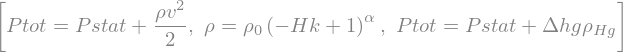

In [4]:
rho, Ptot, g = sp.symbols('rho Ptot g')
dh=sp.Symbol('\Delta h') # on peut avoir un nom avec un espace si on utilise sp.Symbol !

eq1=sp.Eq(Ptot, Pstat+rho/2*v**2)
eq2=sp.Eq(rho, rho0*(1-k*H)**alpha)
eq3=sp.Eq(Ptot, Pstat +dh*rho_Hg*g)
[eq1, eq2, eq3]

In [5]:
sols=sp.solve([eq1,eq2,eq3],v, Pstat, rho)

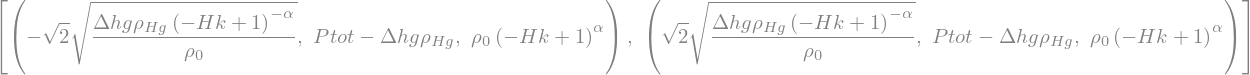

In [6]:
sols

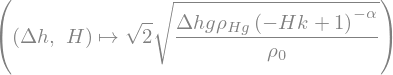

In [7]:
v=sp.Lambda((dh, H),sols[1][0])
v

### QB : Linéariser autour de $\Delta h0$, $H0$

On cherche une relation
$$ v_{lin} = v0 + S_{\Delta h} * (\Delta h-\Delta h0) + S_H * (H-H0) $$
Avec 
$$ S_{\Delta h} = \frac{\partial v}{\partial \Delta h} $$
et
$$ S_H = \frac{\partial v}{\partial H} $$
et
$$ v0 = v(\Delta h0, H0) $$

In [8]:
# Expression pour S_dh, dérivée dv/dh
S_dh=sp.Lambda((dh,H),v(dh,H).diff(dh))

In [9]:
S_H=sp.Lambda((dh,H),v(dh,H).diff(H))

In [10]:
#v0=v(dh0,H0)
H0, v0=sp.symbols('H0 v0')
dh0 = sp.Symbol("\Delta h0")
vlin=sp.Lambda((dh, H),v0+S_H(dh0,H0)*(H-H0)+S_dh(dh0,H0)*(dh-dh0))

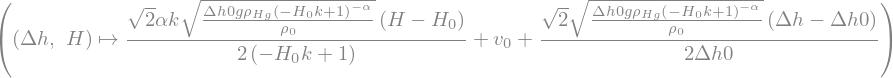

In [11]:
vlin

On s'aperçoit que les expressions de $S_H$ et $S_{\Delta h}$ comportent l'expression de la vitesse v0. On a donc
$$
v(\Delta h, H)= v0 \cdot (1+\frac{\alpha k}{2(1-k H_0)} (H-H_0)+ \frac{\Delta h - \Delta h_0}{2\Delta h_0}))
$$

Calculer l'expression de dh0. En partant de l'équation qui donne la vitesse en fonction de dh0 et H0, on résoud pour dh0 :

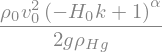

In [12]:
sp.solve(sp.Eq(v0, v(dh0,H0)), dh0)[0]

### QC : Calculer la vitesse v1 avec la formule et la linéarisation

In [14]:
vAlpha = 5.26
vRho0=1.29
vK=22.6e-6
vg=9.81
vRho_Hg=13600

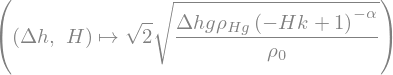

In [15]:
v(0.0413,3000).subs(alpha,vAlpha).subs(rho0,vRho0).subs(k, vK).subs(rho_Hg,vRho_Hg).subs(g,vg).evalf()*3.6
v

In [16]:
vlin(0.041, 3000).subs(alpha,vAlpha).subs(rho0,vRho0).subs(k, vK).subs(rho_Hg,vRho_Hg).subs(g,vg).subs(dh0,0.0785).subs(H0,10000).subs(v0,900/3.6).evalf()*3.6

## Représentation graphique

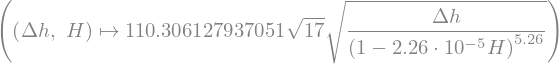

In [17]:
vp=v.subs(g,vg).subs(rho_Hg,vRho_Hg).subs(k,vK).subs(rho0,vRho0).subs(alpha,vAlpha)
vp

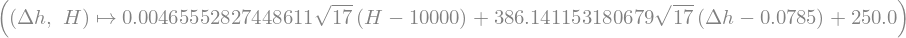

In [18]:
vlinp=vlin.subs(g,vg).subs(rho_Hg,vRho_Hg).subs(k,vK).subs(rho0,vRho0).subs(alpha,vAlpha).subs(H0,10000).subs(v0,900/3.6).subs(dh0,0.0785)
vlinp

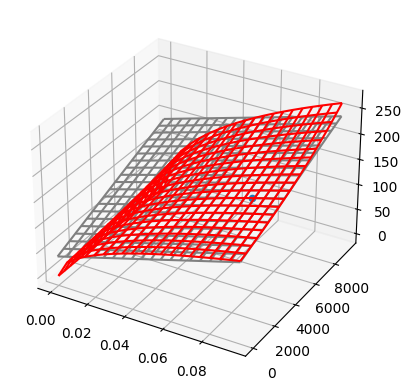

In [19]:
vH0=4000
vdh0=0.0785
vV0=vp(vdh0,vH0)
vlinp=vlin.subs(g,vg).subs(rho_Hg,vRho_Hg).subs(k,vK).subs(rho0,vRho0).subs(alpha,vAlpha).subs(H0,vH0).subs(v0,vV0).subs(dh0,vdh0).evalf()

from matplotlib import cm 

#p=sp.plotting.plot3d(vp,vlinp,(dh,0,0.1),(H,1000,10000), show=False, surface_color=[lambda a, b, c: (-c, cmap='gray'),lambda a, b, c: (-c, cmap='magma')])

rdh=np.arange(0,0.1,0.005)
rH =np.arange(0,10000,500)


rV = np.zeros((len(rdh),len(rH)))
rVlin = np.zeros((len(rdh),len(rH)))


for idh in range(len(rdh)):
    for iH in range(len(rH)):
        rV[idh,iH] = vp(rdh[idh],rH[iH])
        rVlin[idh,iH] = vlinp(rdh[idh],rH[iH])

rH, rdh = np.meshgrid(rH, rdh)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface
#ax.plot_surface(rdh, rH, rV, cmap=cm.coolwarm)
ax.scatter(vdh0, vH0, vV0, marker='o')
ax.plot_wireframe(rdh, rH, rV, color='red')
ax.plot_wireframe(rdh, rH, rVlin, color='gray')
plt.show()

In [ ]:
vp